# Lab 08 Prelab: Analytic chi-squared minimization

In [2]:
%reset -f
import data_entry2
import matplotlib.pyplot as plt
import numpy as np

In Lab 08 you will continue to collect data from the RC circuit in an effort to improve your dataset. Additionally, this prelab will provide you with an analytic formula to help you automatically **calculate** the best fitting parameters to your data.

**An important reminder!** Even though this will give you the best fit of your model to your data, it does not allow you to say "this is a *good* fit". The best fit, by definition, is one that minimizes chi-squared, but a minimized chi-squared of $\chi^2=11.8$ is still not a good fit to your data. Conversely, a minimized chi-squared of $\chi^2=0.05$ still requires you to take a closer look at your uncertainty estimation strategy, since the uncertainties would likely be overestimated. This automated method of chi-squared minimization will still require you to use residuals plots and your other techniques for assessing goodness of fit.

## An analytic formula for minimizing chi-squared

Recall that chi-squared is a continuous function of the fitting parameters in your model. Specifically, if you have $P$ parameters in your model, then chi-squared is a $P$-dimensional function. For instance, if we are fitting a one-parameter linear model, $y=mx$, then $m$ is the sole parameter and the associated chi-squared function is $\chi^2(m)$. For a two-parameter linear model, $y=mx+b$, then we would have $\chi^2(m,b)$. 

For simple model functions like straight lines, we can use calculus to analytically find the best values of the parameters without having to iteratively search for them. Below, we'll work through that calculation for the case of a straight line fit with no intercept. It is not crucial that you understand all the steps here.

From your calculus courses, you know that you can take a continuous function $f(x)$ and find the minimum or maximum (a critical point, $x_c$) by taking the derivative of $f(x)$ with respect to $x$, setting this derivative equal to zero, and solving the resulting equation

$$\left[\frac{df(x)}{dx}\right]_{x=x_c}=0.$$

Since $\chi^2$ is a continuous function, we can do exactly this process to come up with an expression that automatically calculates the critical point(s), to find the minimum. In other words, we can use calculus to derive an *analytic* expression for the best fit parameter(s).

*NOTE! for those thinking: wait a minute, how do we know the critical point will be a minimum and not a maximum? If we think about fitting a model to data that is finite, we know that as we move the parameters to $+\infty$ and $-\infty$ the fit will become increasingly worse to the data, meaning that chi-squared has no maxima. From this observation is follows that any critical point found must be a minimum.*

In the simplest case of a one-parameter linear model, $y=mx$, we wish to minimize chi-squared with respect to $m$ to find the best fit slope

$$ \frac{d\chi^2(m)}{dm} = 0.$$

We can first substitute our general expression for chi-squared

$$ \frac{d}{dm}\left[ \frac{1}{N-P} \sum_{i=1}^N \left(\frac{y_i - f(x_i)}{u\_y_i}\right)^2 \right] = 0.$$

Our model is $f(x_i) = mx_i$, which we can substitute into the above expression

$$ \frac{d}{dm}\left[ \frac{1}{N-P} \sum_{i=1}^N \left(\frac{y_i - mx_i}{u\_y_i}\right)^2 \right] = 0.$$

Since the derivative is with respect to $m$, it has no effect on $N$ or $P$, meaning we can move that leading fraction outside of the derivative.

$$ \frac{1}{N-P} \frac{d}{dm} \sum_{i=1}^N \left(\frac{y_i - mx_i}{u\_y_i}\right)^2 = 0.$$

The summation is only over variables with a subscript "$i$"; $m$ does not contain this so we can also switch the order of differentiation and summation

$$ \frac{1}{N-P} \sum_{i=1}^N \frac{d}{dm} \left(\frac{y_i - mx_i}{u\_y_i}\right)^2 = 0.$$

Now we perform some calculus and take the derivative (invoking the chain rule)

$$ \frac{2}{N-P} \sum_{i=1}^N  \left(\frac{y_i - mx_i}{u\_y_i}\right) \cdot \frac{d}{dm} \left(\frac{y_i - mx_i}{u\_y_i}\right)= 0,$$

$$ \frac{2}{N-P} \sum_{i=1}^N  \left(\frac{y_i - mx_i}{u\_y_i}\right) \cdot \left(-\frac{x_i}{u\_y_i}\right) = 0.$$

The negative sign can be taken outside the sum, and since we are setting everything equal to zero the $2/(N-P)$ can be discarded

$$ \sum_{i=1}^N  \left(\frac{y_i - mx_i}{u\_y_i}\right) \cdot \frac{x_i}{u\_y_i} = 0.$$

What remains is to rearrange this expression for $m$. We can start by expanding the terms in the summation

$$ \sum_{i=1}^N  \left(\frac{y_i}{u\_y_i} - m\frac{x_i}{u\_y_i}\right) \cdot \frac{x_i}{u\_y_i} = 0$$
$$ \sum_{i=1}^N  \frac{x_iy_i}{(u\_y_i)^2} - m\frac{x_i^2}{(u\_y_i)^2} = 0$$

then finally isolate $m$

$$ m = \frac{\sum_{i=1}^N  \frac{x_iy_i}{(u\_y_i)^2}}{\sum_{i=1}^N \frac{x_i^2}{(u\_y_i)^2}} $$

So given our $x$ and $y$ data plus the uncertainty in $y$, we are able to analytically solve for the best fit slope using this equation! The uncertainty in this slope can be determined from the uncertainties in the data by uncertainty propagation. The result is:

$$ u\_m = \sqrt{\frac{1}{\sum_{i=1}^N \frac{x_i^2}{(u\_y_i)^2}}} .$$

Since the term $\sum_{i=1}^N \frac{x_i^2}{(u\_y_i)^2}$ appears both in $m$ and $u\_m$, it is convenient for notation and coding purposes to define a placeholder variable

$$ Z = \sum_{i=1}^N \frac{x_i^2}{(u\_y_i)^2} $$

such that

$$ m = \frac{1}{Z} \sum_{i=1}^N  \frac{x_iy_i}{(u\_y_i)^2} $$
$$ u\_m = \sqrt{\frac{1}{Z}} .$$

**Your turn #1:** Take a close look at the expression for $u\_m$. How do (a) the number of data points, $N$, and (b) the uncertainies in the data, $u\_y_i$, impact the relative uncertainty $u\_m/m$?

The more we increase the uncertainties in data, smaller the value for $u_m$. The more we increase the number of data points, the higher the value of $u_m$, 

## Applying the analytic equation to sample data

The code below does some of the work to set up these equations for $m$ and $u\_m$ for the sample data of last week's pre-lab. 

**Your turn #2:** Work your way through the code below and <u>complete the missing steps</u>, and then run the cell to see:

- A plot of the data and best fit slope $m$, along with lines for those at the 68% CI limits: ($m+u\_m$), and ($m-u\_m$); and
- the corresponding residuals plots;


Best fit slope m =  3.545444003081639 +/- 0.04581209150201686
chi2 = 0.7594


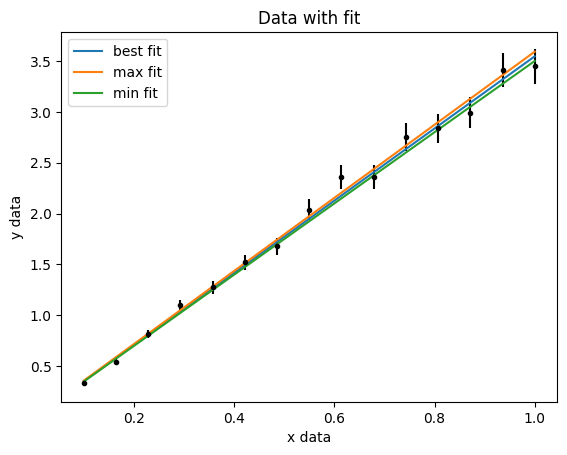

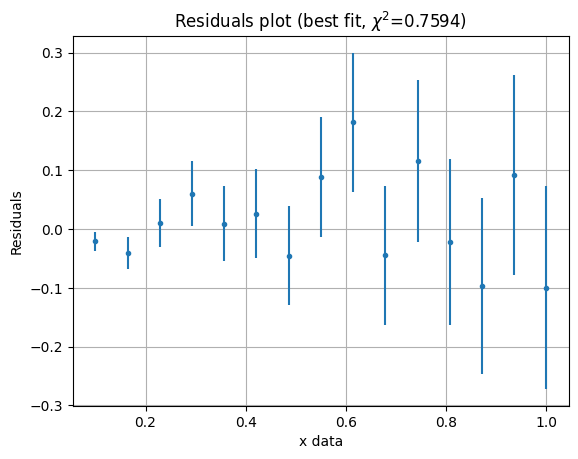

In [4]:
# Complete the missing steps in this cell and run this cell

""" Sample data """
xdata = np.array([0.1, 0.16428571, 0.22857143, 0.29285714, 0.35714286, 0.42142857, 0.48571429, 0.55, 0.61428571, 0.67857143, \
                   0.74285714, 0.80714286, 0.87142857, 0.93571429, 1.])
ydata = np.array([0.33336864, 0.5414786, 0.82003978, 1.09858314, 1.27560974, 1.52025082, 1.67681586, 2.03833678, \
                  2.35943739, 2.36120224, 2.74941308, 2.83963194, 2.9932707, 3.40978616, 3.44578725])
uydata = np.array([0.01666843, 0.02707393, 0.04100199, 0.05492916, 0.06378049, 0.07601254, 0.08384079, 0.10191684, \
                   0.11797187, 0.11806011, 0.13747065, 0.1419816, 0.14966353, 0.17048931, 0.17228936])

""" Find the best model corresponding to the minimized chi-squared """

# calculations for the analytic best fit here: 
Z = np.sum( (xdata * xdata) / uydata**2) # calculate sum(x_i*x_i/(u_y_i)^2)
### FILL IN THE MISSING STEPS TO CALCULATE m AND um HERE ###

# Calculate best fit slope
m = (1/Z) * np.sum((xdata * ydata) / (uydata**2))

# Calculate uncertainty in best fit slope
um = np.sqrt(1/Z)


# Print the best fit slope and uncertainty
print("Best fit slope m = ", m, "+/-", um)

# Find max and min slopes based on m and u[m]
mMax = m + um # slope at maximum of 68% CI 
mMin = m - um # slope at minimum of 68% CI 

""" Construct the models for plotting; calculate residuals """

ymodelBest = m * xdata # best fit model
ymodelMax = mMax * xdata # max model
ymodelMin = mMin * xdata # min model

res = ydata - ymodelBest # calculate residuals (best fit)
wres2 = (res/uydata)**2 # weighted residuals squared
    
""" Calculate chi-squared """
    
N = len(xdata) # number of data points
P = 1 # number of parameters
chi2 = np.sum(wres2) / (N - P) # calculate chi-squared
print("chi2 = {:.4f}".format(chi2))

""" Plot data and fits """

plt.errorbar(xdata, ydata, uydata, marker='.', linestyle='', color='k')
plt.plot(xdata, ymodelBest, label="best fit")
plt.plot(xdata, ymodelMax, label="max fit")
plt.plot(xdata, ymodelMin, label="min fit")
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('Data with fit')
plt.legend()
plt.show()

""" Plot residuals for the best fit """

plt.errorbar(xdata, res, uydata, marker='.', linestyle='')
plt.xlabel('x data')
plt.ylabel('Residuals')
plt.title('Residuals plot (best fit, $\chi^2$={:.4f})'.format(chi2))
plt.grid()
plt.show()


You should find the best fit slope is 3.545 +/- 0.046

Below, you can see a visualization of how the analytically-determined $m$ lies at the lowest point of the chi-squared vs. $m$ curve (as expected for a minimum). An array of many different $m$ values is created, and chi-squared is calculated for each of those different slope values. Finally, the calculated chi-squared values are plotted versus slope.

The code below uses a programming construction of python called a "for" loop. You will not need to know how to use these!

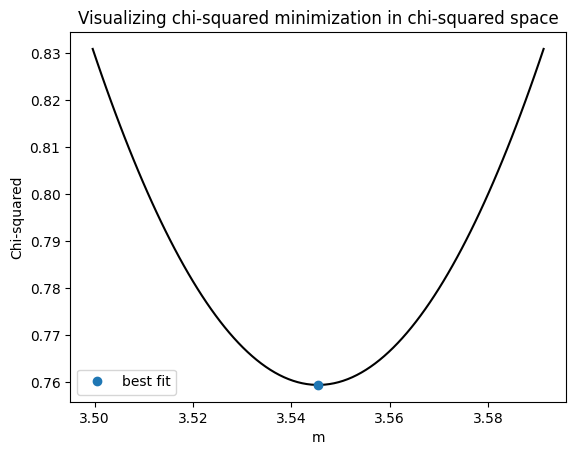

In [5]:
# Run me to see a plot of chi-squared vs slope, for slopes ranging from mMin to mMax

""" plot chi-squared as a function of m """

mVec = np.linspace(mMin,mMax,100) # prepare an array of different slope values
chi2Vec = np.zeros(np.size(mVec)) # create an array of chi-squared values, set each to 0 for now.

for i in range(len(mVec)): # loop through all the different m values.
    # the indented code below is executed once for each of the m values 
    # we calculate chi-squared for each possible slope.
    ymodelTemp = mVec[i]*xdata # model for the current value of m in the vector
    resTemp = ydata - ymodelTemp # residuals for this model
    wres2Temp = (resTemp / uydata)**2 # weighting these residuals
    chi2Vec[i] = np.sum(wres2Temp) / (N - P) # store chi2 in the i'th position of chi2Vec.
    
plt.plot(mVec, chi2Vec, 'k')
plt.plot(m, chi2, 'o', label='best fit')
plt.xlabel('m')
plt.ylabel('Chi-squared')
plt.title('Visualizing chi-squared minimization in chi-squared space')
plt.legend()
plt.show()

## Prepare for Lab 08

In Lab 08, you will use the analytic formula derived above to calculate the best fit slope for your time-constant versus resistance data. 

**Your turn #3:** In preparation for Lab 08, adapt your calculations from above for your Lab 07 data. Check that this gets you a lower chi-squared than what you got from minimizing by hand in Lab 07.

In [ ]:
# Use this cell to re-analyze your Lab 07 data using your 
# python calculations from the analytic formula from above

# You will need to adjust the source filename below to match the name of your Lab 07 data file:
de = data_entry2.sheet_copy('../Lab07/lab07data2','lab07datacopy')

# Now calculate Z, m, and u_m 
Z = np.sum( (xdata * xdata) / uydata**2) # calculate sum(x_i*x_i/(u_y_i)^2)
m = (1/Z) * np.sum((xdata * ydata) / (uydata**2))
um = np.sqrt(1/Z)

# Calculate chi-squared with calculated m. 
N = len(xdata)
P = 1
chi2 = np.sum(wres2) / (N - P)
print("chi2 = {:.4f}".format(chi2))

# It's probably a good idea to produce the relevant plots as well

### I have not completed lab 7 at this time. I will make sure to do this part of the prelab later once I finish lab 7 by friday.

# Submit

Steps for submission:

1. Click: Run => Run_All_Cells
2. Read through the notebook to ensure all the cells executed correctly and without error.
3. File => Save_and_Export_Notebook_As->HTML
4. Inspect your exported html file.
5. Upload the HTML document to the lab submission assignment on Canvas.

In [ ]:
display_sheets()